# Looking at the seeding position of the buoys for all the periods of interest

This notebook aims to create an illustrative figure of the seeding position of the buoys.

In [1]:
#Importation of the different libraries

##Loading of NetCDF files
import xarray as xr

##Computing
import numpy as np

##Graphical display
import matplotlib.pyplot as plt
    ###Projection
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## Loading the seeding and mask files

In [2]:
#Some useful variables for the loadings

##Some paths
path_store_commun="/lustre/fsstor/projects/rech/cli/commun/"
path_work_Laurep="/lustre/fswork/projects/rech/cli/udf71br/Laurines_work_Datlas/"
path_store_perso="/lustre/fsstor/projects/rech/cli/udf71br/"
rep_seeding="IABP_buoys_related_files/Seeding/nc/"

##Dates of seeding
seed_date=["1997-01-16","1997-01-26","1997-02-05","1997-02-15","1997-02-25","1997-03-07","1997-03-17",\
           "1997-03-27","1997-04-06","1997-04-16","1997-04-26","1997-05-06","1997-05-16"]
print(seed_date)

['1997-01-16', '1997-01-26', '1997-02-05', '1997-02-15', '1997-02-25', '1997-03-07', '1997-03-17', '1997-03-27', '1997-04-06', '1997-04-16', '1997-04-26', '1997-05-06', '1997-05-16']


In [3]:
#Loading the seeding files

dat_seed=[]

for date in seed_date: #iteration over the seeding dates
    path=path_store_perso+rep_seeding+"sitrack_seeding_sidfex_"+date+".nc"
    print(path)
    dat_seed.append(xr.open_dataset(path,decode_times=True))
print(len(dat_seed))

/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-01-16.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-01-26.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-02-05.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-02-15.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-02-25.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-03-07.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-03-17.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_seeding_sidfex_1997-03-27.nc
/lustre/fsstor/projects/rech/cli/udf71br/IABP_buoys_related_files/Seeding/nc/sitrack_see

## Figure of the seeding position of the buoys

In [4]:
#Choose the buoys to highlight differently

selected_buoys=[["1997-03-07","1997-02-15","1997-02-05","1997-03-27","1997-03-07"],[1101,8058,9358,9361,9353]] 
##the first sublist is the date of the seeding of the buoy, and the second sublist is the id of the buoy
print(selected_buoys)

[['1997-03-07', '1997-02-15', '1997-02-05', '1997-03-27', '1997-03-07'], [1101, 8058, 9358, 9361, 9353]]


seeding date: 1997-01-16
seeding date: 1997-01-26
seeding date: 1997-02-05
1997-02-05 9358 yellow 139.272 86.783
seeding date: 1997-02-15
1997-02-15 8058 limegreen 127.952 86.494
seeding date: 1997-02-25
seeding date: 1997-03-07
1997-03-07 1101 red -154.552 74.886
1997-03-07 9353 magenta 49.693 87.551
seeding date: 1997-03-17
seeding date: 1997-03-27
1997-03-27 9361 cyan -126.747 83.584
total number of buoys:  101


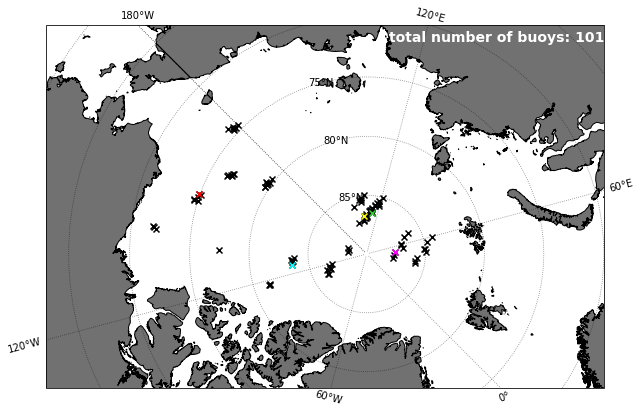

In [6]:
#Figure to visualise the seeding position of the buoys

##Choose of the period(s) of interest

period_interest=[0,1,2,3,4,5,6,7] #consider only the first eight periods (those of Fiol et al. (2026))

##Colors associated with the selected buoys

colors=["red","limegreen","yellow","cyan","magenta"]

##Initialisation of the variable that will count the buoys

nb_buoys=0

##Creation of the figure and a useful variable for the projection

trdata=ccrs.PlateCarree() #for the projection

fig,ax=plt.subplots(1,1,figsize=(10,10),facecolor="white",subplot_kw={ 'projection': ccrs.NorthPolarStereo(central_longitude=-45., true_scale_latitude=70.) })

##Plot the seeding positions
for iperiod in period_interest: #iteration over the periods of interest
    print("seeding date: "+seed_date[iperiod])

    ##Plot the seeding positions of the buoys
    ax.scatter(dat_seed[iperiod].longitude,dat_seed[iperiod].latitude,facecolor="black",ec="black",marker="x",transform=trdata)

    ##Plot the seeding position in a different color for the selected buoys
    for ipos in np.where(seed_date[iperiod]==np.array(selected_buoys[0]))[0]:
        ib=np.where(dat_seed[iperiod].id_buoy==selected_buoys[1][ipos])[0][0]
        color=colors[ipos]
        print(seed_date[iperiod],dat_seed[iperiod].id_buoy[ib].values,color,dat_seed[iperiod].longitude[0,ib].values,dat_seed[iperiod].latitude[0,ib].values)
        ax.scatter(dat_seed[iperiod].longitude[0,ib],dat_seed[iperiod].latitude[0,ib],facecolor=color,ec=color,marker="x",transform=trdata,zorder=5)
    
    ##Update the number of buoys
    nb_buoys+=dat_seed[iperiod].sizes["buoy"]

##Plot the total number of buoys
print("total number of buoys: ", nb_buoys)
ax.text(129,72,"total number of buoys: "+str(nb_buoys),color="white",fontsize=14,fontweight="bold",transform=trdata)

##Set-up the background
land = cfeature.GSHHSFeature(scale="intermediate",levels=[1],facecolor="#727171")
ax.add_feature(land,zorder=-1)
        
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
    
##Set up the axes
ax.tick_params('both',labelsize=22)
    ##in order to zoom in on the part of the Arctic that interests us
ax.scatter(-50,80,transform=trdata,color="white",zorder=-2)
ax.scatter(130,72,transform=trdata,color="white",zorder=-2)
ax.scatter(50,72,transform=trdata,color="white",zorder=-2)
ax.scatter(-170,60,transform=trdata,color="white",zorder=-2)

plt.show()
##Saving of the figure (change the path if needed)
#fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_traj_new_exp/maps_seed_pos.png",\
#            facecolor="white",edgecolor="none",bbox_inches="tight")